### Dataset Link: https://www.kaggle.com/datasets/janmejaybhoi/cotton-disease-dataset

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [224,224]
train_path = 'Cotton Disease/train'
valid_path = 'Cotton Disease/test'

In [3]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob("Cotton Disease/train/*")

In [6]:
folders

['Cotton Disease/train\\diseased cotton leaf',
 'Cotton Disease/train\\diseased cotton plant',
 'Cotton Disease/train\\fresh cotton leaf',
 'Cotton Disease/train\\fresh cotton plant']

In [7]:
x = (vgg16.output)Flatten()

In [8]:
prediction = Dense(len(folders), activation="softmax")(x)

In [9]:
# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [12]:
# Use the ImageDataGenerator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('Cotton Disease/train',
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Cotton Disease/test',
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [15]:
r = model.fit_generator(training_set,
                       validation_data = test_set,
                       epochs=2,
                       steps_per_epoch=len(training_set),
                       validation_steps=len(test_set))

<ipython-input-15-b58eca3990e1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(training_set,


Epoch 1/2
61/61 [==============================] - 734s 12s/step - loss: 0.6829 - accuracy: 0.7278 - val_loss: 0.3848 - val_accuracy: 0.8396
Epoch 2/2
61/61 [==============================] - 850s 14s/step - loss: 0.2370 - accuracy: 0.9118 - val_loss: 0.2594 - val_accuracy: 0.8868


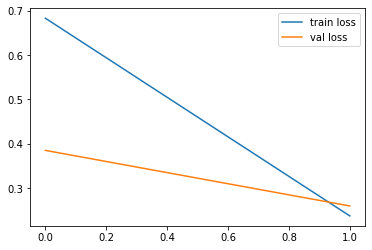

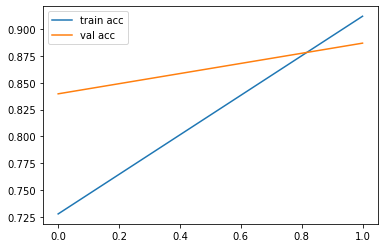

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
#plot.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred

array([[5.19013181e-02, 2.35461488e-01, 6.99934363e-01, 1.27027184e-02],
       [5.67737594e-03, 6.51323259e-01, 4.00217221e-04, 3.42599124e-01],
       [3.53746093e-03, 7.53441546e-03, 1.97052513e-03, 9.86957669e-01],
       [1.81000680e-01, 2.19779540e-04, 8.17544401e-01, 1.23515516e-03],
       [9.61729020e-05, 2.94608569e-08, 9.99903679e-01, 1.03148693e-07],
       [1.49524378e-04, 1.53598161e-02, 4.77929413e-03, 9.79711354e-01],
       [9.88269225e-04, 2.91442368e-02, 1.90691091e-03, 9.67960596e-01],
       [2.17216499e-02, 7.81909603e-06, 9.78034735e-01, 2.35753221e-04],
       [3.37111764e-04, 1.12342043e-02, 8.17495893e-05, 9.88346994e-01],
       [9.94559348e-01, 9.54094168e-04, 4.46135644e-03, 2.52332156e-05],
       [9.64256283e-03, 7.37088919e-03, 9.25654709e-01, 5.73318303e-02],
       [9.96212125e-01, 2.42998154e-04, 1.29684247e-03, 2.24810187e-03],
       [7.70234255e-05, 1.90034714e-02, 3.80721845e-04, 9.80538726e-01],
       [8.82730544e-01, 9.10431445e-02, 4.95252665e

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model=('model_vgg16.h5')


In [23]:
img=image.load_img('Cotton Disease/test/diseased cotton plant/dd (31)_iaip.jpg',target_size=(224,224))


In [24]:
x=image.img_to_array(img)
x

array([[[ 74.,  78.,  51.],
        [133., 123.,  98.],
        [132., 114.,  90.],
        ...,
        [122., 105.,  61.],
        [124., 110.,  65.],
        [127., 112.,  71.]],

       [[102.,  90.,  66.],
        [ 99.,  83.,  58.],
        [ 90.,  74.,  48.],
        ...,
        [151., 128.,  94.],
        [145., 122.,  90.],
        [138., 117.,  86.]],

       [[126., 104.,  81.],
        [125., 108.,  82.],
        [103.,  94.,  63.],
        ...,
        [119.,  95.,  67.],
        [129., 105.,  77.],
        [100.,  76.,  52.]],

       ...,

       [[ 75., 123.,  61.],
        [ 75., 123.,  61.],
        [ 78., 126.,  64.],
        ...,
        [ 78., 127.,  46.],
        [ 79., 131.,  49.],
        [ 94., 149.,  66.]],

       [[ 76., 124.,  62.],
        [ 76., 124.,  62.],
        [ 80., 128.,  66.],
        ...,
        [ 73., 122.,  41.],
        [ 76., 128.,  46.],
        [ 71., 126.,  43.]],

       [[ 78., 126.,  64.],
        [ 78., 126.,  64.],
        [ 81., 1

In [25]:
x.shape

(224, 224, 3)

In [26]:
x = x/255